# purpose of the project
In this project we are going to analyse the users usage criteria for calls, messages and internet used. We will be able to find insights which will be useful for the telecom company to manage their future policies especially regarding thier vailable user plans.

Our methodology for this project is based on **following objectives**:
- Preprocessing of data including fixes the observed issues in the data like data types and missing values
- Perform analysis on the individual dataframes to create our own analytical dataframes and then used them to findout hidden insights in the data
- In the nd we will perform hypothesis testing to answere the question based on user plan avilable for this company.



---



#Initialization

In [1]:
# importing all the required libraries
import pandas as pd
import numpy as np
from scipy import stats


#Load data

In [2]:
# LOading the data into pandas dataframe
calls = pd.read_csv('/home/jovyan/work/calls_per_month.csv')
minutes = pd.read_csv('/home/jovyan/work/minutes_per_month.csv')
messages = pd.read_csv('/home/jovyan/work/messages_per_month.csv')
internet = pd.read_csv('/home/jovyan/work/internet_traffic_per_user_per_month.csv')

calls=pd.read_csv('/datasets/megaline_calls.csv')
internet=pd.read_csv('/datasets/megaline_internet.csv')
messages=pd.read_csv('/datasets/megaline_messages.csv')
plans=pd.read_csv('/datasets/megaline_plans.csv')
users=pd.read_csv('/datasets/megaline_users.csv')

#Prepare the data

# 1. Plans

- Here two types of packages are given **Surf and Ultimate**.

- **0** is for surf (small packages) and **1**for ultimate (large packages)

In [3]:
# checking the random rows of the data
plans.sample(2)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
1,1000,30720,3000,70,7,0.01,0.01,ultimate
0,50,15360,500,20,10,0.03,0.03,surf


In [4]:
# The rows and columns of dataframe
plans.shape

(2, 8)

In [5]:
# To get an idea about columns name,their missing values and datatypes
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [6]:
# Printing the summary statistics of the dataframe
display(plans.describe())

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


**OBSERVATIONS**
- None of the columns have any missing values and all the numerical columns have correct datatypes including integer and float respectively.
- The only minor problem with this data set is that the columns include (usd_per_minute , usd_per_gb , usd_per_message) conveys the message that these charges are within the package but actually they are the charges when the package limit is exceeded.

# Fix data

As the data availabe is already clean according to our requirements so we dont need any fixation here.

# Enrich data

In [7]:
# Enriched data
plans['data_usage_gb'] = plans['mb_per_month_included'] / 1024
display(plans)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,data_usage_gb
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


**Reason**

We have converted the mbs into GBs as this unit is more concise.

# 2. Users

In [8]:
# checking the first 5 rows of the data
users.sample(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
424,1424,Kasandra,Keith,51,"Virginia Beach-Norfolk-Newport News, VA-NC MSA",2018-07-24,ultimate,NaN
135,1135,Scotty,White,51,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-12-23,ultimate,NaN
181,1181,Ron,Kaufman,47,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-13,surf,NaN
363,1363,Sandee,Lott,33,"Seattle-Tacoma-Bellevue, WA MSA",2018-01-05,ultimate,2018-08-16
473,1473,Kirk,Velez,61,"Louisville/Jefferson County, KY-IN MSA",2018-12-31,surf,NaN


In [9]:
# The rows and columns of dataframe
users.shape

(500, 8)

In [10]:
# To get an idea about columns name,their missing values and datatypes
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [11]:
# Printing the summary statistics of the dataframe
display(users.describe())

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


**OBSERVATION**
- In the city column we have multiple information present including city name,state name and metropolitant area.We can sepearte these into individuals columns if needed for the analysis based on states and metropolitant area.
- In the churn date we have only 34 values available but thier unavailability also highlights the important information as it tells these are the customers  who were still using the service when the information in the database was collected.
- The min age is 18 years and the maximum age is 75 years.
- All the data types are correct expect dates related columns.

# Fix data

In [12]:
# Convert the 'reg_date' and 'churn_date' columns to date type
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'])

# Display the updated DataFrame
display(users)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaT
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaT
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaT
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaT


In [13]:
# now the date column data type is chagnged
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


**Reason for changing date data type?**

Converting the 'call_date' column to datetime format ensures data consistency and enables date-based operations, sorting, and visualization in analyses which would otherwise be impossible to do in case the date is present in string form.

# Enrich data

In [14]:
# Split the "city" column into city, state, and metropolitan area
city_info = users['city'].str.split(', ', expand=True)
users['city'] = city_info[0]
users['state_msa'] = city_info[1]
# display the updated DataFrame
display(users)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,state_msa
0,1000,Anamaria,Bauer,45,Atlanta-Sandy Springs-Roswell,2018-12-24,ultimate,NaT,GA MSA
1,1001,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,NaT,WA MSA
2,1002,Carlee,Hoffman,36,Las Vegas-Henderson-Paradise,2018-10-21,surf,NaT,NV MSA
3,1003,Reynaldo,Jenkins,52,Tulsa,2018-01-28,surf,NaT,OK MSA
4,1004,Leonila,Thompson,40,Seattle-Tacoma-Bellevue,2018-05-23,surf,NaT,WA MSA
...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,New York-Newark-Jersey City,2018-09-04,surf,NaT,NY-NJ-PA MSA
496,1496,Ariel,Shepherd,49,New Orleans-Metairie,2018-02-20,surf,NaT,LA MSA
497,1497,Donte,Barrera,49,Los Angeles-Long Beach-Anaheim,2018-12-10,ultimate,NaT,CA MSA
498,1498,Scot,Williamson,51,New York-Newark-Jersey City,2018-02-04,surf,NaT,NY-NJ-PA MSA


**Reason for splitting the city column**

We have done it because we have to perform the statistical testing based on specific states so we have to extract the states values from it.

In [15]:
# 1. Age Group
users['age_group'] = pd.cut(users['age'], bins=[18, 25, 35, 45, 55, 100], labels=['18-25', '26-35', '36-45', '46-55', '55+'])
# 2. Registration Year and Month
users['reg_year'] = pd.to_datetime(users['reg_date']).dt.year
users['reg_month'] = pd.to_datetime(users['reg_date']).dt.month
display(users)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,state_msa,age_group,reg_year,reg_month
0,1000,Anamaria,Bauer,45,Atlanta-Sandy Springs-Roswell,2018-12-24,ultimate,NaT,GA MSA,36-45,2018,12
1,1001,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,NaT,WA MSA,26-35,2018,8
2,1002,Carlee,Hoffman,36,Las Vegas-Henderson-Paradise,2018-10-21,surf,NaT,NV MSA,36-45,2018,10
3,1003,Reynaldo,Jenkins,52,Tulsa,2018-01-28,surf,NaT,OK MSA,46-55,2018,1
4,1004,Leonila,Thompson,40,Seattle-Tacoma-Bellevue,2018-05-23,surf,NaT,WA MSA,36-45,2018,5
...,...,...,...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,New York-Newark-Jersey City,2018-09-04,surf,NaT,NY-NJ-PA MSA,55+,2018,9
496,1496,Ariel,Shepherd,49,New Orleans-Metairie,2018-02-20,surf,NaT,LA MSA,46-55,2018,2
497,1497,Donte,Barrera,49,Los Angeles-Long Beach-Anaheim,2018-12-10,ultimate,NaT,CA MSA,46-55,2018,12
498,1498,Scot,Williamson,51,New York-Newark-Jersey City,2018-02-04,surf,NaT,NY-NJ-PA MSA,46-55,2018,2


Comparing different groups over time. For example, group customer data by year and country to compare customer behavior in different countries over time. This could help you identify which countries are experiencing the fastest growth, which countries are losing customers, and which countries are most profitable.


**Reason for age groups and reg month**

 - Extract the registration year and month from the 'reg_date' column. This can be useful for tracking user registration trends over time.
 - Categorize users into age groups (e.g., 18-25, 26-35, 36-45, etc.). This can help in understanding the distribution of users across different age ranges.

**What do we need age segmentation for?**

**Marketing Targeting:** Age segmentation helps tailor marketing efforts for each plan based on age group preferences and responsiveness to advertising messages.

**Product Customization:** It allows customization of plan features, pricing, and add-ons to match the specific needs and budgets of different age groups.

**Churn Analysis:** By understanding age-specific churn patterns, it enables adjustments to improve customer retention strategies.

**Revenue Maximization:** It aids in optimizing pricing and service offerings to maximize revenue, considering how different age groups use telecom services.

**Demographic Insights:** Combined with other demographic data like location, it provides a comprehensive view of the customer base for informed business decisions and market expansion.



---



# 3. Calls

In [16]:
# checking the first 5 rows of the data
calls.sample(5)

,id,user_id,call_date,duration
82185,1296_76,1296,2018-11-07,0.00
99150,1355_228,1355,2018-12-26,4.66
21351,1079_64,1079,2018-08-16,7.68
105684,1373_164,1373,2018-10-04,0.00
40011,1147_839,1147,2018-08-10,28.37


In [17]:
# The rows and columns of dataframe
calls.shape

(137735, 4)

In [18]:
# To get an idea about columns name,their missing values and datatypes
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [19]:
# Printing the summary statistics of the dataframe
display(calls.describe())

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


**OBSERVATIONS**
- All the columns have correct data types except date realted columns.
- No column has null values
- The mean time for duration of call is 6.74 minutes.
- The call_date column data type is string(object) we will change it into date format

# Fix data

In [20]:
# Convert the "call_date" column in the "calls" DataFrame to date format
calls['call_date'] = pd.to_datetime(calls['call_date'])

# Print the updated "calls" DataFrame with the "call_date" column in date format
display(calls)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


In [21]:
# now the date column data type is chagnged
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


**Reason for changing date data type?**

Converting the 'call_date' column to datetime format ensures data consistency and enables date-based operations, sorting, and visualization in analyses which would otherwise be impossible to do in case the date is present in string form.

# Enrich data

In [22]:
# Round up call durations to the nearest whole minute
calls['duration'] = np.ceil(calls['duration'])

# 1. Call Month
calls['call_month'] = pd.to_datetime(calls['call_date']).dt.month

# 2. Call Day of the Week
calls['call_day_of_week'] = pd.to_datetime(calls['call_date']).dt.day_name()

# 3. Call Duration Group (Example: Short < 5 minutes, Medium 5-10 minutes, Long > 10 minutes)
calls['call_duration_group'] = pd.cut(calls['duration'], bins=[0, 5, 10, float('inf')], labels=['Short', 'Medium', 'Long'])

display(calls)

,id,user_id,call_date,duration,call_month,call_day_of_week,call_duration_group
0,1000_93,1000,2018-12-27,9.0,12,Thursday,Medium
1,1000_145,1000,2018-12-27,14.0,12,Thursday,Long
2,1000_247,1000,2018-12-27,15.0,12,Thursday,Long
3,1000_309,1000,2018-12-28,6.0,12,Friday,Medium
4,1000_380,1000,2018-12-30,5.0,12,Sunday,Short
...,...,...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,9.0,11,Wednesday,Medium
137731,1499_200,1499,2018-10-20,11.0,10,Saturday,Long
137732,1499_201,1499,2018-09-21,9.0,9,Friday,Medium
137733,1499_202,1499,2018-10-10,1.0,10,Wednesday,Short


**Reason for round up call durations to the nearest whole minute**

Rounding up call durations to the nearest whole minute ensures accurate billing, maintains billing consistency, promotes fairness among customers, enhances cost predictability, simplifies billing processes, and aids in regulatory compliance when necessary.

**Reasons for above changes**

**Call Month:**

Extract the month from the "call_date" column. This can help in analyzing call patterns by month.

**Call Day of the Week:**

Extract the day of the week from the "call_date" column to understand call patterns by day.

**Call Duration Group:**

Categorize call durations into groups (e.g., short, medium, long) to understand the distribution of call durations.



---



# 4. Messages

In [23]:
# checking the first 5 rows of the data
messages.sample(5)

,id,user_id,message_date
42976,1281_271,1281,2018-08-08
62930,1398_170,1398,2018-12-24
59482,1375_471,1375,2018-12-13
16339,1110_230,1110,2018-08-02
55316,1347_353,1347,2018-12-06


In [24]:
# The rows and columns of dataframe
messages.shape

(76051, 3)

In [25]:
# To get an idea about columns name,their missing values and datatypes
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [26]:
# Printing the summary statistics of the dataframe
display(messages.describe())

,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


**OBSERVATIONS**
- All the columns have correct data types except date related columns.
- No column has null values


# Fix data

In [27]:
# Convert the 'message_date' column to date format
messages['message_date'] = pd.to_datetime(messages['message_date'])

# Display the updated DataFrame (optional)
display(messages)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


In [28]:
# now the date column data type is chagnged
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


**Reason for changing date data type?**

Converting the 'call_date' column to datetime format ensures data consistency and enables date-based operations, sorting, and visualization in analyses which would otherwise be impossible to do in case the date is present in string form.

# Enrich data

In [29]:
# 1. Message Month
messages['message_month'] = pd.to_datetime(messages['message_date']).dt.month

# 2. Message Day of the Week
messages['message_day_of_week'] = pd.to_datetime(messages['message_date']).dt.day_name()

display(messages)

,id,user_id,message_date,message_month,message_day_of_week
0,1000_125,1000,2018-12-27,12,Thursday
1,1000_160,1000,2018-12-31,12,Monday
2,1000_223,1000,2018-12-31,12,Monday
3,1000_251,1000,2018-12-27,12,Thursday
4,1000_255,1000,2018-12-26,12,Wednesday
...,...,...,...,...,...
76046,1497_526,1497,2018-12-24,12,Monday
76047,1497_536,1497,2018-12-24,12,Monday
76048,1497_547,1497,2018-12-31,12,Monday
76049,1497_558,1497,2018-12-24,12,Monday


**Reason for above changing**

**Message Month:**

 Extract the month from the "message_date" column. This can help in analyzing message patterns by month.

**Message Day of the Week:**

Extract the day of the week from the "message_date" column to understand message patterns by day.



---



# 5. Internet

In [30]:
# checking the first 5 rows of the data
internet.sample(5)

,id,user_id,session_date,mb_used
74021,1347_116,1347,2018-07-31,0.00
58168,1262_20,1262,2018-12-29,98.97
11417,1056_84,1056,2018-09-02,38.25
96769,1455_12,1455,2018-11-24,230.11
48925,1219_35,1219,2018-12-22,340.70


In [31]:
# The rows and columns of dataframe
internet.shape

(104825, 4)

In [32]:
# To get an idea about columns name their missing values and datatypes
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [33]:
# Printing the summary statistics of the dataframe
display(internet.describe())

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


**OBSERVATIONS**
- All the columns have correct data types except the date realted column.
- No column has null values
- The mean value for mb used per web session is 366.7mbs


# Fix data

In [34]:
# Convert the 'session_date' column to date format
internet['session_date'] = pd.to_datetime(internet['session_date'])

# Display the updated DataFrame (optional)
display(internet)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


In [35]:
# now the date column data type is chagnged
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


**Reason for changing date data type?**

Converting the 'call_date' column to datetime format ensures data consistency and enables date-based operations, sorting, and visualization in analyses which would otherwise be impossible to do in case the date is present in string form.

# Enrich data

In [36]:
# 1. Session Month
internet['session_month'] = pd.to_datetime(internet['session_date']).dt.month

# 2. Round up Data Usage and Calculate in Gigabytes (GB)
internet['data_usage_gb'] = np.ceil(internet.groupby(['user_id', 'session_month'])['mb_used'].transform('sum') / 1024)

# 3. Data Usage Group (Example: Low < 3 GB, Medium 4-10 GB, High > 10 GB)
internet['data_usage_group'] = pd.cut(internet['data_usage_gb'], bins=[5, 10, 20, float('inf')], labels=['Low', 'Medium', 'High'])

internet.sample(5)

,id,user_id,session_date,mb_used,session_month,data_usage_gb,data_usage_group
7080,1039_355,1039,2018-09-21,696.60,9,19.0,Medium
62940,1291_65,1291,2018-08-24,1018.23,8,21.0,High
74101,1347_196,1347,2018-10-13,0.00,10,22.0,High
56535,1255_323,1255,2018-10-30,198.18,10,11.0,Medium
52093,1234_14,1234,2018-12-14,808.13,12,10.0,Low


**Reason for round up data usage to the nearest whole GB**

Rounding up data usage to the nearest whole GB ensures accurate billing, maintains billing consistency, promotes fairness among customers, enhances cost predictability, simplifies billing processes, and aids in regulatory compliance when necessary.

**Reason for above changes**

**Session Month:**

Extract the month from the "session_date" column. This can help in analyzing internet usage patterns by month.

**Data Usage Group:**

Categorize data usage into groups (e.g., low, medium, high) to understand the distribution of data usage.



---

---





---



---



# Study plan conditions

Here we are going to see the plans information and dataframe again to familarize ourselves with the company policy as it will help us in the future analysis.

In [37]:
# checking the random rows of the data
plans.sample(2)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,data_usage_gb
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


In [38]:
# To get an idea about columns name,their missing values and datatypes
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
 8   data_usage_gb          2 non-null      float64
dtypes: float64(3), int64(5), object(1)
memory usage: 272.0+ bytes


#Aggregate data per user

**Calculate the number of calls made by each user per month. Save the result**.


In [39]:
# Create a new column 'month' to extract the month from the 'call_date'
calls['month'] = calls['call_date'].dt.month

# Group the data by 'user_id' and 'month', and then count the number of calls for each group
calls_per_month = calls.groupby(['user_id', 'month'])['id'].count().reset_index()

# Rename the 'id' column to 'calls_count'
calls_per_month.rename(columns={'id': 'calls_count'}, inplace=True)

# Save the result to a CSV file
calls_per_month.to_csv('calls_per_month.csv', index=False)

# Display the result (optional)
display(calls_per_month)

,user_id,month,calls_count
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


Here the dataframe tells us the numbers of calls made by each customer in the respective months in 2018. I.E the user having user_id 1000 only call in the december and not in any other month.



---



**Calculate the amount of minutes spent by each user per month. Save the result.**


In [40]:
# Group the data by 'user_id' and 'month', and then sum the 'duration' for each group
minutes_per_month = calls.groupby(['user_id', 'month'])['duration'].sum().reset_index()

# Rename the 'duration' column to 'total_minutes'
minutes_per_month.rename(columns={'duration': 'total_minutes'}, inplace=True)

# Save the result to a CSV file
minutes_per_month.to_csv('minutes_per_month.csv', index=False)

# Display the result (optional)
display(minutes_per_month)

,user_id,month,total_minutes
0,1000,12,124.0
1,1001,8,182.0
2,1001,9,315.0
3,1001,10,393.0
4,1001,11,426.0
...,...,...,...
2253,1498,12,339.0
2254,1499,9,346.0
2255,1499,10,385.0
2256,1499,11,308.0




---



**Calculate the number of messages sent by each user per month. Save the result.**


In [41]:
# Create a new column 'month' to extract the month from the 'message_date'
messages['month'] = messages['message_date'].dt.month

# Group the data by 'user_id' and 'month', and then count the number of messages for each group
messages_per_month = messages.groupby(['user_id', 'month'])['id'].count().reset_index()

# Rename the 'id' column to 'messages_count'
messages_per_month.rename(columns={'id': 'messages_count'}, inplace=True)

# Save the result to a CSV file
messages_per_month.to_csv('messages_per_month.csv', index=False)

# Display the result (optional)
display(messages_per_month)

,user_id,month,messages_count
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11




---



**Calculate the volume of internet traffic used by each user per month. Save the result.**


In [42]:
# Extract the month from the 'session_date' column
internet['month'] = internet['session_date'].dt.month

# Group the data by 'user_id' and 'month' and sum the 'mb_used' column
internet_traffic_per_user_per_month = internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()

# Convert the 'mb_used' column to GB
internet_traffic_per_user_per_month['gb_used'] = internet_traffic_per_user_per_month['mb_used'] / 1024

# Save the result to a new dataframe or CSV file
internet_traffic_per_user_per_month.to_csv('internet_traffic_per_user_per_month.csv', index=False)

# Display the result
display(internet_traffic_per_user_per_month)

,user_id,month,mb_used,gb_used
0,1000,12,1901.47,1.856904
1,1001,8,6919.15,6.756982
2,1001,9,13314.82,13.002754
3,1001,10,22330.49,21.807119
4,1001,11,18504.30,18.070605
...,...,...,...,...
2272,1498,12,23137.69,22.595400
2273,1499,9,12984.76,12.680430
2274,1499,10,19492.43,19.035576
2275,1499,11,16813.83,16.419756




---



**Merge the data for calls, minutes, messages, internet based on user_id and month**


In [43]:
calls = pd.read_csv('/home/jovyan/work/calls_per_month.csv')
minutes = pd.read_csv('/home/jovyan/work/minutes_per_month.csv')
messages = pd.read_csv('/home/jovyan/work/messages_per_month.csv')
internet = pd.read_csv('/home/jovyan/work/internet_traffic_per_user_per_month.csv')

# Merge the dataframes one by one based on 'user_id' and 'month'
merged_data = calls.merge(minutes, on=['user_id', 'month'], how='outer')
merged_data = merged_data.merge(messages, on=['user_id', 'month'], how='outer')
merged_data = merged_data.merge(internet, on=['user_id', 'month'], how='outer')

# Save the merged data to a CSV file
merged_data.to_csv('merged_data.csv', index=False)

# Display the merged data (optional)
display(merged_data)

,user_id,month,calls_count,total_minutes,messages_count,mb_used,gb_used
0,1000,12,16.0,124.0,11.0,1901.47,1.856904
1,1001,8,27.0,182.0,30.0,6919.15,6.756982
2,1001,9,49.0,315.0,44.0,13314.82,13.002754
3,1001,10,65.0,393.0,53.0,22330.49,21.807119
4,1001,11,64.0,426.0,36.0,18504.30,18.070605
...,...,...,...,...,...,...,...
2288,1349,12,NaN,NaN,61.0,13039.91,12.734287
2289,1361,5,NaN,NaN,2.0,1519.69,1.484072
2290,1482,10,NaN,NaN,2.0,NaN,NaN
2291,1108,12,NaN,NaN,NaN,233.17,0.227705


In [44]:
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,state_msa,age_group,reg_year,reg_month
0,1000,Anamaria,Bauer,45,Atlanta-Sandy Springs-Roswell,2018-12-24,ultimate,NaT,GA MSA,36-45,2018,12
1,1001,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,NaT,WA MSA,26-35,2018,8
2,1002,Carlee,Hoffman,36,Las Vegas-Henderson-Paradise,2018-10-21,surf,NaT,NV MSA,36-45,2018,10
3,1003,Reynaldo,Jenkins,52,Tulsa,2018-01-28,surf,NaT,OK MSA,46-55,2018,1
4,1004,Leonila,Thompson,40,Seattle-Tacoma-Bellevue,2018-05-23,surf,NaT,WA MSA,36-45,2018,5


In [45]:
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,data_usage_gb
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


In [46]:
users_plan=users[['user_id','plan']]
new_merge_data=merged_data.merge(users_plan,on='user_id',how='left')
new_merge_data.fillna(0)

,user_id,month,calls_count,total_minutes,messages_count,mb_used,gb_used,plan
0,1000,12,16.0,124.0,11.0,1901.47,1.856904,ultimate
1,1001,8,27.0,182.0,30.0,6919.15,6.756982,surf
2,1001,9,49.0,315.0,44.0,13314.82,13.002754,surf
3,1001,10,65.0,393.0,53.0,22330.49,21.807119,surf
4,1001,11,64.0,426.0,36.0,18504.30,18.070605,surf
...,...,...,...,...,...,...,...,...
2288,1349,12,0.0,0.0,61.0,13039.91,12.734287,surf
2289,1361,5,0.0,0.0,2.0,1519.69,1.484072,surf
2290,1482,10,0.0,0.0,2.0,0.00,0.000000,ultimate
2291,1108,12,0.0,0.0,0.0,233.17,0.227705,ultimate




---



# Add the plan information


**Calculate the monthly revenue for each user**

In [47]:
# Define a function to calculate monthly revenue for each user
def calculate_monthly_revenue(row):
    # Calculate excess usage for calls, messages, and data
    excess_calls = max(0, row['calls_count'] - row['minutes_included'])
    excess_messages = max(0, row['messages_count'] - row['messages_included'])
    excess_data_gb = max(0, round((row['mb_used'] - row['mb_per_month_included']) / 1024))  # Convert MB to rounded GB
    # Calculate the cost of excess usage
    call_cost = excess_calls * row['usd_per_minute']
    message_cost = excess_messages * row['usd_per_message']
    data_cost = excess_data_gb * row['usd_per_gb']

    # Calculate the total monthly revenue
    total_revenue = row['usd_monthly_pay'] + call_cost + message_cost + data_cost
    return total_revenue




---



---



---



#Study user behaviour

#1.Calls

**Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.**


In [48]:
users_plan.head()

,user_id,plan
0,1000,ultimate
1,1001,surf
2,1002,surf
3,1003,surf
4,1004,surf


In [49]:
calls=pd.read_csv('/datasets/megaline_calls.csv')
calls_plan = calls.merge(users_plan, on="user_id", how="left")
calls_plan['call_date'] = pd.to_datetime(calls_plan['call_date'])

In [50]:
calls_plan['call_month'] = calls_plan['call_date'].dt.month
calls_plan.head()

,id,user_id,call_date,duration,plan,call_month
0,1000_93,1000,2018-12-27,8.52,ultimate,12
1,1000_145,1000,2018-12-27,13.66,ultimate,12
2,1000_247,1000,2018-12-27,14.48,ultimate,12
3,1000_309,1000,2018-12-28,5.76,ultimate,12
4,1000_380,1000,2018-12-30,4.22,ultimate,12


In [51]:
grouped_data = calls_plan.groupby(['plan', 'call_month'])['duration'].mean().reset_index()
grouped_data

,plan,call_month,duration
0,surf,1,6.428000
1,surf,2,6.906175
2,surf,3,6.696919
3,surf,4,6.799918
4,surf,5,6.769200
5,surf,6,6.846812
6,surf,7,6.721710
7,surf,8,6.726164
8,surf,9,6.728684
9,surf,10,6.722302


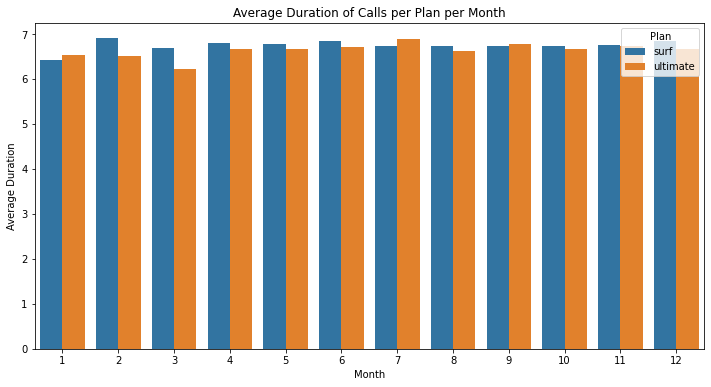

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot to compare average duration of calls per plan per month
plt.figure(figsize=(12, 6))
sns.barplot(x='call_month', y='duration', hue='plan', data=grouped_data)

# Add labels and a title
plt.xlabel('Month')
plt.ylabel('Average Duration')
plt.title('Average Duration of Calls per Plan per Month')

# Show the plot
plt.legend(title='Plan')
plt.show()

- There is not a considerable difference between the Average Duration of Calls per Plan per Month of two different plans.



---



**Compare the number of minutes users of each plan require each month. Plot a histogram.**


In [53]:
plans_ = plans[['minutes_included', 'plan_name']]
calls_plan = calls_plan.merge(plans_, left_on='plan', right_on='plan_name', how='left')
calls_plan = calls_plan[['duration','plan','call_month','minutes_included']]
calls_plan

,duration,plan,call_month,minutes_included
0,8.52,ultimate,12,3000
1,13.66,ultimate,12,3000
2,14.48,ultimate,12,3000
3,5.76,ultimate,12,3000
4,4.22,ultimate,12,3000
...,...,...,...,...
137730,8.72,surf,11,500
137731,10.89,surf,10,500
137732,8.12,surf,9,500
137733,0.37,surf,10,500


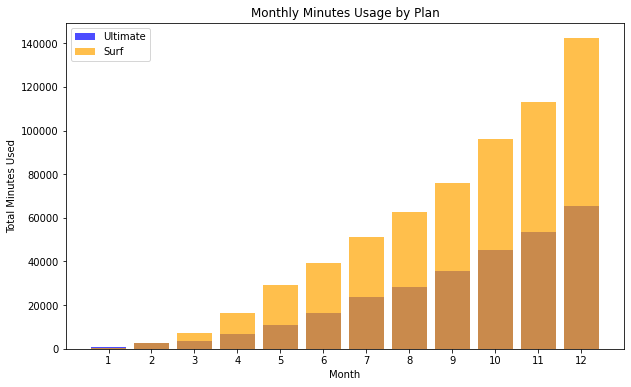

In [54]:

# Group the data by 'plan' and 'call_month' and calculate the total minutes used per group
minutes_per_month = calls_plan.groupby(['plan', 'call_month'])['duration'].sum().reset_index()

# Create separate DataFrames for each plan
ultimate = minutes_per_month[minutes_per_month['plan'] == 'ultimate']
surf = minutes_per_month[minutes_per_month['plan'] == 'surf']

# Plot bar graphs to compare total minutes used per month for each plan
plt.figure(figsize=(10, 6))
plt.bar(ultimate['call_month'], ultimate['duration'], label='Ultimate', color='blue', alpha=0.7)
plt.bar(surf['call_month'], surf['duration'], label='Surf', color='orange', alpha=0.7)

# Add labels and a legend
plt.xlabel('Month')
plt.ylabel('Total Minutes Used')
plt.title('Monthly Minutes Usage by Plan')
plt.xticks(range(1, 13))  # Assuming months are from 1 to 12
plt.legend()

# Show the plot
plt.show()

- We can see that for every month the total minutes used in surf plan is higher as compared to ultimate plan.

**Calculate the mean and the variance of the monthly call duration**


In [55]:
# Calculate the mean and variance of the monthly call duration
monthly_mean = grouped_data.groupby('call_month')['duration'].mean()
monthly_variance = grouped_data.groupby('call_month')['duration'].var()

# Display the results
display("Monthly Mean Duration:")
display(monthly_mean)

display("\nMonthly Variance of Duration:")
display(monthly_variance)

'Monthly Mean Duration:'

call_month
1     6.484759
2     6.711703
3     6.453913
4     6.729954
5     6.715822
6     6.776000
7     6.800397
8     6.669824
9     6.749362
10    6.694076
11    6.750811
12    6.754268
Name: duration, dtype: float64

'\nMonthly Variance of Duration:'

call_month
1     0.006443
2     0.075639
3     0.118105
4     0.009790
5     0.005699
6     0.010029
7     0.012383
8     0.006348
9     0.000855
10    0.001593
11    0.000138
12    0.013560
Name: duration, dtype: float64

In [56]:
# Create a DataFrame from the mean and variance data
mean_and_variance_df = pd.DataFrame({'Monthly Mean Duration': monthly_mean, 'Monthly Variance of Duration': monthly_variance})

# Reset the index to make 'call_month' a regular column
mean_and_variance_df.reset_index(inplace=True)
mean_and_variance_df

,call_month,Monthly Mean Duration,Monthly Variance of Duration
0,1,6.484759,0.006443
1,2,6.711703,0.075639
2,3,6.453913,0.118105
3,4,6.729954,0.009790
4,5,6.715822,0.005699
5,6,6.776000,0.010029
6,7,6.800397,0.012383
7,8,6.669824,0.006348
8,9,6.749362,0.000855
9,10,6.694076,0.001593


- By closely seeing the values of monthly mean duration  and monthly variance of duration of calls we can see that there is not a noteable difference in terms of month.

**Plot a boxplot to visualize the distribution of the monthly call duration**


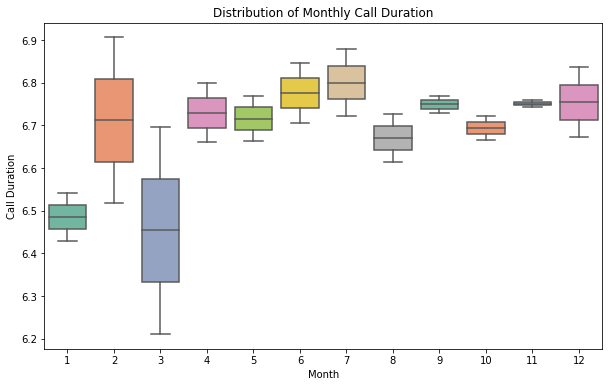

In [57]:
# Create a boxplot to visualize the distribution of monthly call duration
plt.figure(figsize=(10, 6))
sns.boxplot(x='call_month', y='duration', data=grouped_data, palette='Set2')

# Add labels and a title
plt.xlabel('Month')
plt.ylabel('Call Duration')
plt.title('Distribution of Monthly Call Duration')

# Show the plot
plt.show()

- The durations of call is less for 1st and 3rd month as compared to the rest of the months.



---



---



---



#Messages

**Compare the number of messages users of each plan tend to send each month**


In [58]:
messages.head()

,user_id,month,messages_count
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


In [59]:
messages=pd.read_csv('/datasets/megaline_messages.csv')
messages_plan = messages.merge(users_plan, on="user_id", how="left")
messages_plan['message_date'] = pd.to_datetime(messages_plan['message_date'])
messages_plan['message_month'] = messages_plan['message_date'].dt.month
messages_plan.head()

,id,user_id,message_date,plan,message_month
0,1000_125,1000,2018-12-27,ultimate,12
1,1000_160,1000,2018-12-31,ultimate,12
2,1000_223,1000,2018-12-31,ultimate,12
3,1000_251,1000,2018-12-27,ultimate,12
4,1000_255,1000,2018-12-26,ultimate,12


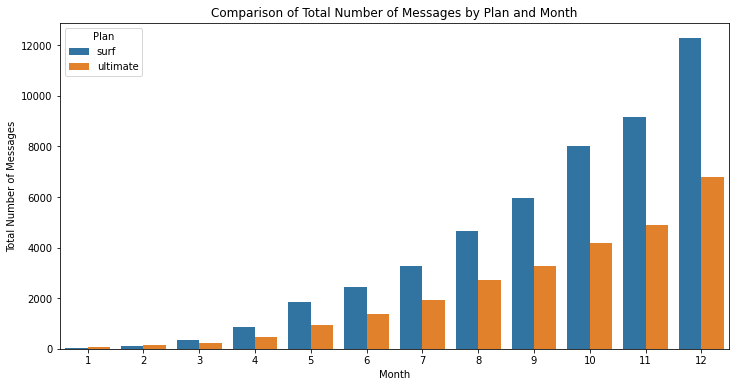

In [60]:
# Group the data by plan and message month, and calculate the total number of messages
total_messages_per_month = messages_plan.groupby(['plan', 'message_month'])['id'].count().reset_index()
total_messages_per_month.rename(columns={'id': 'total_messages'}, inplace=True)

# Create a bar plot to compare the total number of messages per plan per month
plt.figure(figsize=(12, 6))
sns.barplot(x='message_month', y='total_messages', hue='plan', data=total_messages_per_month)

# Add labels and a title
plt.xlabel('Month')
plt.ylabel('Total Number of Messages')
plt.title('Comparison of Total Number of Messages by Plan and Month')

# Add a legend
plt.legend(title='Plan')

# Show the plot
plt.show()

- There is a clear pattern that the number of messages users of each plan tend to send each month is increasing from january to december respectively
- Another important difference here is that the number of messages user sent is higher for surf plans as compared to ultimate plans for almost every month.



---



---



---



# Internet

**Compare the amount of internet traffic consumed by users per plan**

In [61]:
# Merge the two DataFrames on 'user_id'
internet_plan = internet.merge(users_plan, on='user_id', how='left')

# Convert 'mb_used' to gigabytes (GB)
internet_plan['gb_used'] = internet_plan['mb_used'] / 1024  # 1 GB = 1024 MB

# Group by 'plan' and calculate the total GB used for each plan
plan_gb_usage = internet_plan.groupby('plan')['gb_used'].sum().reset_index()

# Display the results
print(plan_gb_usage)

       plan       gb_used
0      surf  25435.722588
1  ultimate  12104.085723


In [62]:
internet_plan.head()

,user_id,month,mb_used,gb_used,plan
0,1000,12,1901.47,1.856904,ultimate
1,1001,8,6919.15,6.756982,surf
2,1001,9,13314.82,13.002754,surf
3,1001,10,22330.49,21.807119,surf
4,1001,11,18504.30,18.070605,surf


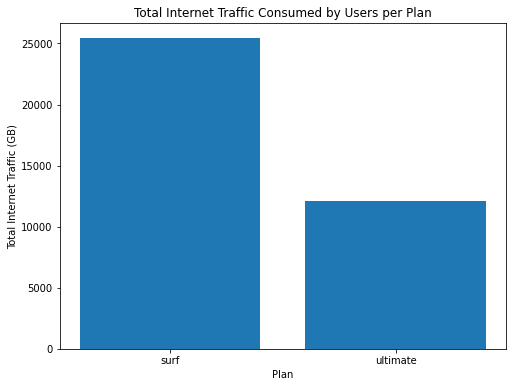

In [63]:
# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(plan_gb_usage['plan'], plan_gb_usage['gb_used'])
plt.xlabel('Plan')
plt.ylabel('Total Internet Traffic (GB)')
plt.title('Total Internet Traffic Consumed by Users per Plan')
plt.show()

- In the above bat chart the data usage of two plans are compared **in terms of GB**
- There is a clear difference in traffic consumption of data among different plans available. THe surf consumption is vary large as compared to ultimate plan.

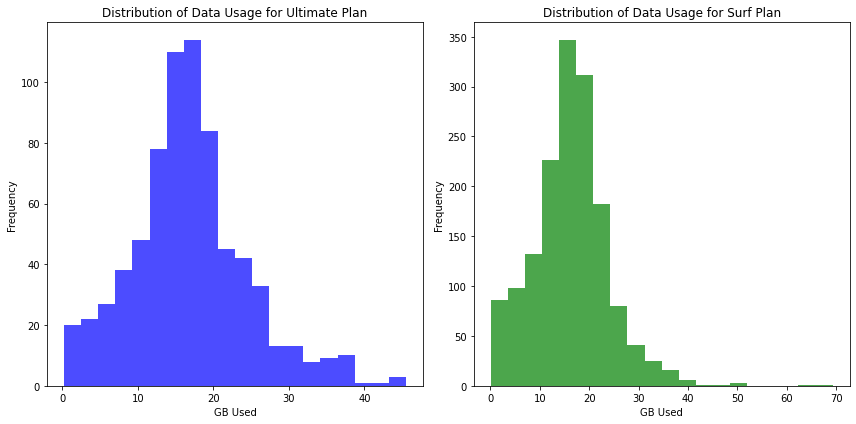

In [64]:
# Create separate DataFrames for 'ultimate' and 'surf' plans
ultimate_data = internet_plan[internet_plan['plan'] == 'ultimate']
surf_data = internet_plan[internet_plan['plan'] == 'surf']

# Create histograms to visualize the data distribution for both plans
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(ultimate_data['gb_used'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Data Usage for Ultimate Plan')
plt.xlabel('GB Used')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(surf_data['gb_used'], bins=20, color='green', alpha=0.7)
plt.title('Distribution of Data Usage for Surf Plan')
plt.xlabel('GB Used')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Great visualization. Well done!)

- This distribution is based on id( one id represent one unique web session for a particular user)
- Clearly it can be seen that in both plans the low amount of data usage sessions are more frequent as compared to high amount data usage sessions.



---



---



---



---



# Revenue

**statistically describe the revenue between the plans**

In [ ]:
plan_revenue_summary = merged_data.groupby('plan')['monthly_revenue'].describe()

plt.figure(figsize=(10, 6))
sns.boxplot(x='plan', y='monthly_revenue', data=merged_data)
plt.title('Monthly Revenue Distribution by Plan')
plt.xlabel('Plan')
plt.ylabel('Monthly Revenue')
plt.show()

- Monthly revenue for surf plans are high as compared to ultimate palns (in general)

In [ ]:
# Group your DataFrame by the "plan" column and calculate the mean revenue for each plan
plan_revenue_mean = merged_data.groupby('plan')['monthly_revenue'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='plan', y='monthly_revenue', data=plan_revenue_mean)
plt.title('Average Monthly Revenue by Plan')
plt.xlabel('Plan')
plt.ylabel('Average Monthly Revenue')
plt.show()

- It is very important to see that in terms of Average Monthly Revenue the ultimate plans revenue generation is more than surf plans.

In [ ]:
plan_revenue_summary

- The std of surf is greater as compared to ultimate palns and it is revaledated from the fact that more outliers(higher revenue values) are present in surf plans as compared to ultimate plans.



---



---



---



# Test statistical hypotheses

**1. Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.**

**Null Hypothesis (H0):**

The average revenue from users of the Ultimate and Surf calling plans is equal.

**Alternative Hypothesis (H1):**

The average revenue from users of the Ultimate and Surf calling plans is not equal.

**Statistic model**

To test this hypothesis, we can use a two-sample t-test because we are comparing the means of two independent groups (Ultimate and Surf plans) to determine if they are statistically different from each other.

**Significance Level (Alpha)**:

We need to choose a significance level, denoted as α, which represents the probability of making a Type I error. A common choice for α is 0.05, which corresponds to a 5% significance level. This means that we are willing to accept a 5% chance of making a Type I error (rejecting the null hypothesis when it's actually true).

In [ ]:
# Assuming your dataset is stored in a DataFrame called merged_data
ultimate_revenue = merged_data[merged_data['plan'] == 'ultimate']['monthly_revenue']
surf_revenue = merged_data[merged_data['plan'] == 'surf']['monthly_revenue']

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(ultimate_revenue, surf_revenue, equal_var=False)

alpha = 0.05

print(f'Test Statistic: {t_statistic}')
print(f'P-value: {p_value}')

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in average revenue between Ultimate and Surf plan users.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in average revenue between Ultimate and Surf plan users.")




---



**2. Test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions**

**Null Hypothesis (H0):**

The average revenue from users in the NY-NJ area is equal to the average revenue from users in other regions.

**Alternative Hypothesis (H1):**

The average revenue from users in the NY-NJ area is different from the average revenue from users in other regions.

**Statistic model**

To test this hypothesis, you can use a two-sample t-test because you're comparing the means of two independent groups (NY-NJ area users and users from other regions) to determine if they are statistically different from each other.

**Significance Level (Alpha):**

Choose a significance level (α) to control the Type I error rate. A common choice is α = 0.05, which corresponds to a 5% significance level. This means that you are willing to accept a 5% chance of making a Type I error (rejecting the null hypothesis when it's actually true).

In [ ]:
display(merged_data[['user_id', 'month', 'plan', 'monthly_revenue']])

In [ ]:
# Assuming you have two DataFrames: merged_data and users
# Merge the data on 'user_id' to get user information along with monthly revenue
merged_data = pd.merge(merged_data, users[['user_id', 'state_msa']], on='user_id')

# Define the unique values that represent NY-NJ area and other regions
ny_nj_area = 'NY-NJ-PA MSA'

# Separate revenue data for NY-NJ area and other regions
ny_nj_revenue = merged_data[merged_data['state_msa'] == ny_nj_area]['monthly_revenue']
other_regions_revenue = merged_data[merged_data['state_msa'] != ny_nj_area]['monthly_revenue']

# Perform the two-sample t-test
t_statistic, p_value = stats.ttest_ind(ny_nj_revenue, other_regions_revenue, equal_var=False)

alpha = 0.05

print(f'Test Statistic: {t_statistic}')
print(f'P-value: {p_value}')

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in average revenue between NY-NJ area users and users from other regions.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in average revenue between NY-NJ area users and users from other regions.")




---

---





---



# Conclusion

- There is not a considerable difference between the Average Duration of Calls per Plan per Month of two different plans
- By closely seeing the values of monthly mean duration  and monthly variance of duration of calls we can see that there is not a noteable difference in terms of month.
- The durations of call is less for 1st and 3rd month as compared to the rest of the months.
- **We can see that for every month the total minutes used in surf plan is higher as compared to ultimate plan.**
- There is a clear pattern that the number of messages users of each plan tend to send each month is increasing from january to december respectively
- Another important difference here is that the number of messages user sent is higher for surf plans as compared to ultimate plans for almost every month.
- There is a clear difference in traffic consumption of data among different plans available. THe surf consumption is vary large as compared to ultimate plan.
- **Clearly it can be seen that in both plans the low amount of data usage sessions are more frequent as compared to high amount data usage sessions**.
- Monthly revenue for surf plans are high as compared to ultimate palns (in general)
- It is very important to see that in terms of Average Monthly Revenue the ultimate plans revenue generation is more than surf plans.
- The std of surf is greater as compared to ultimate palns and it is revaledated from the fact that more outliers(higher revenue values) are present in surf plans as compared to ultimate plans.
- There is a significant difference in average revenue between Ultimate and Surf plan users.
- There is a significant difference in average revenue between NY-NJ area users and users from other regions